# ByT5 Model

In [1]:
# imports
from transformers import TrainingArguments, ByT5Tokenizer
from sklearn.metrics import roc_curve, auc
from utils import ByT5_model, ByT5_utils
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
load_dotenv()

# CONSTANTS
SAVE = True
VERSION = "v1"
SAVE_VERSION = "v1"
RESULTS_PATH = os.getenv("RESULTS_PATH")
MODEL_PATH = os.getenv("MODEL_PATH")

In [3]:
# load data
# need to put in our data here. the data format expects the following format:
# url, label
# url is the whole url
# label is 0 for non-phishing, and 1 for phishing

train_data = pd.read_csv("datasets/train.csv")
val_data = pd.read_csv("datasets/validation.csv")
bench_data = pd.read_csv("datasets/benchmark.csv")

print(f"{len(train_data)} training samples")
print(f"{len(val_data)} validation samples")
print(f"{len(bench_data)} benchmark samples")

2604 training samples
325 validation samples
327 benchmark samples


In [4]:
# training data
train_count = train_data["label"].value_counts()
val_count = val_data["label"].value_counts()
phish_count = train_count[1] + val_count[1]
benign_count = train_count[0] + val_count[0]
print(f"Training and validation data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

# benchmark data
bench_count = bench_data["label"].value_counts()
phish_count = bench_count[1]
benign_count = bench_count[0]
print(f"Benchmark data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

Training and validation data value count:
phishing: 1003
benign: 1926
Benchmark data value count:
phishing: 112
benign: 215


In [5]:
# intialise model, tokenizer
model = ByT5_model.ByT5ForClassification(
    model_name='google/byt5-small',
    num_labels=2,
)
tokenizer = ByT5Tokenizer.from_pretrained('google/byt5-small')

In [6]:
# hyperparameters
BATCH_SIZE = 128
training_args = TrainingArguments(
    # saving results/checkpoints
    output_dir=RESULTS_PATH,
    save_total_limit=3,
    save_safetensors=False,

    # evaluation
    eval_strategy="epoch",
    eval_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    
    # saving
    save_strategy="epoch",
    save_steps=1,
    save_total_limit=3,

    # hyperparameters
    learning_rate=0.005,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=100,
    weight_decay=0.01,
)

In [7]:
# training loop
trainer = ByT5_utils.train_ByT5(
    model=model,
    tokenizer=tokenizer,
    train_data=train_data,
    val_data=val_data,
    training_args=training_args,
    patience=3,
    )

Preparing data...


Map:   0%|          | 0/2604 [00:00<?, ? examples/s]

Map:   0%|          | 0/325 [00:00<?, ? examples/s]

Data prepared.


  0%|          | 0/2100 [00:00<?, ?it/s]

Starting training


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.6061345934867859, 'eval_runtime': 0.7009, 'eval_samples_per_second': 463.685, 'eval_steps_per_second': 4.28, 'epoch': 1.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5833206176757812, 'eval_runtime': 0.6747, 'eval_samples_per_second': 481.707, 'eval_steps_per_second': 4.447, 'epoch': 2.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5603635907173157, 'eval_runtime': 0.6603, 'eval_samples_per_second': 492.215, 'eval_steps_per_second': 4.544, 'epoch': 3.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5431685447692871, 'eval_runtime': 0.6673, 'eval_samples_per_second': 487.021, 'eval_steps_per_second': 4.496, 'epoch': 4.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5282567739486694, 'eval_runtime': 0.6717, 'eval_samples_per_second': 483.823, 'eval_steps_per_second': 4.466, 'epoch': 5.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5230854153633118, 'eval_runtime': 0.6775, 'eval_samples_per_second': 479.716, 'eval_steps_per_second': 4.428, 'epoch': 6.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5154930949211121, 'eval_runtime': 0.6746, 'eval_samples_per_second': 481.771, 'eval_steps_per_second': 4.447, 'epoch': 7.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5136775970458984, 'eval_runtime': 0.6842, 'eval_samples_per_second': 474.98, 'eval_steps_per_second': 4.384, 'epoch': 8.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.5059505701065063, 'eval_runtime': 0.6798, 'eval_samples_per_second': 478.101, 'eval_steps_per_second': 4.413, 'epoch': 9.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4901169538497925, 'eval_runtime': 0.6814, 'eval_samples_per_second': 476.968, 'eval_steps_per_second': 4.403, 'epoch': 10.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.48912137746810913, 'eval_runtime': 0.6824, 'eval_samples_per_second': 476.235, 'eval_steps_per_second': 4.396, 'epoch': 11.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4892331063747406, 'eval_runtime': 0.6803, 'eval_samples_per_second': 477.746, 'eval_steps_per_second': 4.41, 'epoch': 12.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.486072301864624, 'eval_runtime': 0.6821, 'eval_samples_per_second': 476.441, 'eval_steps_per_second': 4.398, 'epoch': 13.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4816364049911499, 'eval_runtime': 0.683, 'eval_samples_per_second': 475.811, 'eval_steps_per_second': 4.392, 'epoch': 14.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4796181917190552, 'eval_runtime': 0.6844, 'eval_samples_per_second': 474.891, 'eval_steps_per_second': 4.384, 'epoch': 15.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4825754165649414, 'eval_runtime': 0.6798, 'eval_samples_per_second': 478.077, 'eval_steps_per_second': 4.413, 'epoch': 16.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.47316575050354004, 'eval_runtime': 0.7117, 'eval_samples_per_second': 456.654, 'eval_steps_per_second': 4.215, 'epoch': 17.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4712654948234558, 'eval_runtime': 0.6811, 'eval_samples_per_second': 477.156, 'eval_steps_per_second': 4.405, 'epoch': 18.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4728897213935852, 'eval_runtime': 0.6775, 'eval_samples_per_second': 479.726, 'eval_steps_per_second': 4.428, 'epoch': 19.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.45971614122390747, 'eval_runtime': 0.6795, 'eval_samples_per_second': 478.319, 'eval_steps_per_second': 4.415, 'epoch': 20.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.4589879512786865, 'eval_runtime': 0.6855, 'eval_samples_per_second': 474.1, 'eval_steps_per_second': 4.376, 'epoch': 21.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.462605357170105, 'eval_runtime': 0.687, 'eval_samples_per_second': 473.103, 'eval_steps_per_second': 4.367, 'epoch': 22.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.45482274889945984, 'eval_runtime': 0.6803, 'eval_samples_per_second': 477.697, 'eval_steps_per_second': 4.41, 'epoch': 23.0}
{'loss': 0.4714, 'grad_norm': 0.09416351467370987, 'learning_rate': 0.0038095238095238095, 'epoch': 23.81}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.45652616024017334, 'eval_runtime': 0.6847, 'eval_samples_per_second': 474.664, 'eval_steps_per_second': 4.382, 'epoch': 24.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.46628761291503906, 'eval_runtime': 0.6818, 'eval_samples_per_second': 476.657, 'eval_steps_per_second': 4.4, 'epoch': 25.0}


  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.45567214488983154, 'eval_runtime': 0.6814, 'eval_samples_per_second': 476.952, 'eval_steps_per_second': 4.403, 'epoch': 26.0}
{'train_runtime': 191.1002, 'train_samples_per_second': 1362.636, 'train_steps_per_second': 10.989, 'train_loss': 0.4674523007738721, 'epoch': 26.0}
Training ended


In [8]:
# evaluate trained model
ByT5_utils.evaluate_ByT5(trainer)

  0%|          | 0/3 [00:00<?, ?it/s]

{'eval_loss': 0.45482274889945984,
 'eval_runtime': 0.7088,
 'eval_samples_per_second': 458.543,
 'eval_steps_per_second': 4.233,
 'epoch': 26.0}

In [9]:
# predict single url
ByT5_utils.predict_single_url(bench_data["url"][0], model, tokenizer)

(0, 0.21027812361717224)

In [10]:
# predict dataframe
y_true, predicted_classes, y_proba = ByT5_utils.predict_dataframe(
    bench_data, model, tokenizer, steps=10000)

Processing 327 samples
Done, processed 327 samples


In [11]:
# statistics
ByT5_utils.fpr_comparison(np.array(y_true), np.array(y_proba))

,0.010,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.000
precision,95.652174,97.727273,97.727273,97.727273,97.727273,97.727273,100.000000,100.000000,100.000000,100.000000,100.000000
fpr,0.009302,0.004651,0.004651,0.004651,0.004651,0.004651,0.000000,0.000000,0.000000,0.000000,0.000000
specificity,99.069767,99.534884,99.534884,99.534884,99.534884,99.534884,100.000000,100.000000,100.000000,100.000000,100.000000
accuracy,78.593272,78.593272,78.593272,78.593272,78.593272,78.593272,76.758410,76.758410,76.758410,76.758410,76.758410
recall,39.285714,38.392857,38.392857,38.392857,38.392857,38.392857,32.142857,32.142857,32.142857,32.142857,32.142857
f1_score,55.696203,55.128205,55.128205,55.128205,55.128205,55.128205,48.648649,48.648649,48.648649,48.648649,48.648649
threshold,0.726365,0.746724,0.746724,0.746724,0.746724,0.746724,0.775377,0.775377,0.775377,0.775377,0.775377


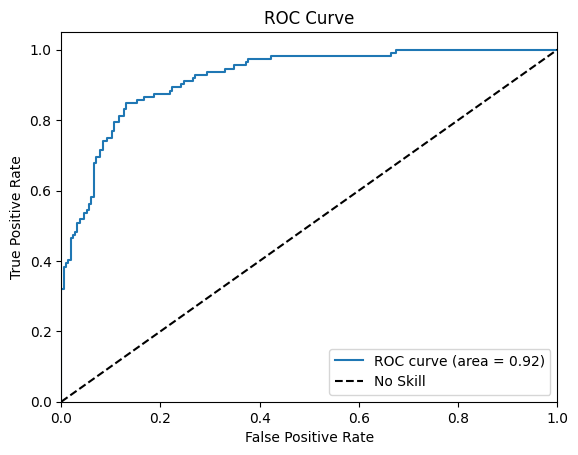

In [12]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
# saving model
if SAVE:
    model.model.save_pretrained(f"{MODEL_PATH}/byt5-model-{SAVE_VERSION}")
    tokenizer.save_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{SAVE_VERSION}")